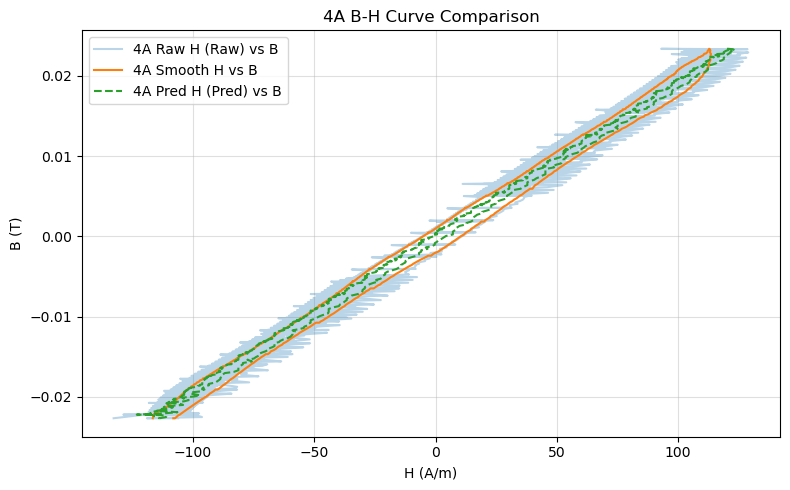

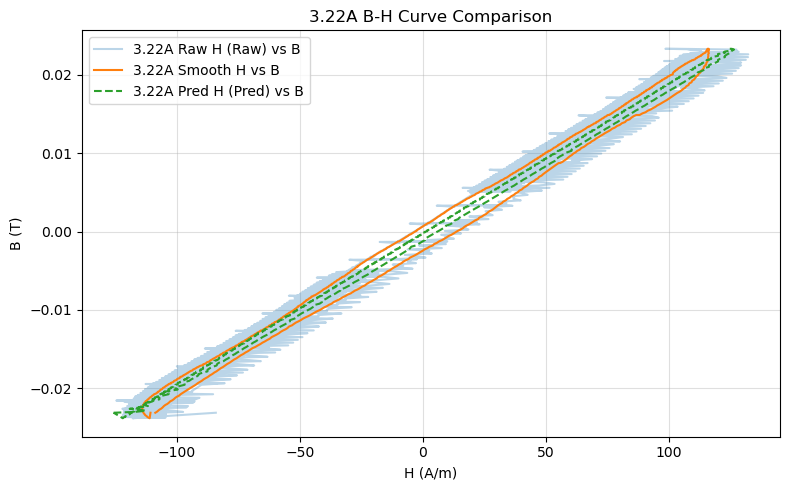

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# ----------------------------
# 一、讀取 CSV（無 Header）並指定欄位名稱
# ----------------------------
csv_path = "./data/BH.csv"  # <- 請根據實際路徑修改

# 1.1 讀檔（header=None 表示 CSV 沒有表頭）
df = pd.read_csv(csv_path, header=None)

# 1.2 指定欄位名稱：
#     col0 = 4A_H_raw, col1 = 4A_H_pred, col2 = 4A_B,
#     col3 = 322A_H_raw, col4 = 322A_H_pred, col5 = 322A_B
df.columns = [
    "H4_raw",  # 第 0 欄：4A 條件下的原始 H
    "H4_pred",  # 第 1 欄：4A 條件下的預測 H
    "B4",  # 第 2 欄：4A 條件下的 B
    "H322_raw",  # 第 3 欄：3.22A 條件下的原始 H
    "H322_pred",  # 第 4 欄：3.22A 條件下的預測 H
    "B322"  # 第 5 欄：3.22A 條件下的 B
]

# 1.3 轉成 numpy array
H4_raw = df["H4_raw"].to_numpy()  # shape = (N,)
H4_pred = df["H4_pred"].to_numpy()  # shape = (N,)
B4 = df["B4"].to_numpy()  # shape = (N,)
H322_raw = df["H322_raw"].to_numpy()  # shape = (N,)
H322_pred = df["H322_pred"].to_numpy()  # shape = (N,)
B322 = df["B322"].to_numpy()  # shape = (N,)

# ----------------------------
# 二、對「原始 H」做 Savitzky–Golay 平滑
# ----------------------------
# 2.1 選擇濾波參數（window_length 必須是奇數且 <= N；polyorder 通常取 2~4）
window_length = 101  # 例：101 點為滑動視窗
polyorder = 3  # 例：3 次多項式擬合

# 2.2 執行濾波
#     如果資料筆數 N 比 window_length 還少，請改成更小的奇數 (e.g. 51, 31, 11)
H4_smooth = savgol_filter(H4_raw,
                          window_length=window_length,
                          polyorder=polyorder)
H322_smooth = savgol_filter(H322_raw,
                            window_length=window_length,
                            polyorder=polyorder)

# ----------------------------
# 三、繪製 4A 條件下：原始 / 平滑後 / 預測 的 B–H 曲線比較
# ----------------------------
plt.figure(figsize=(8, 5))

# (A) 4A 原始 H vs. B（橘色半透明）
plt.plot(H4_raw, B4, alpha=0.3, label="4A Raw H (Raw) vs B")

# (B) 4A 平滑後 H (Smoothed Raw) vs. B（紅色實線）
plt.plot(H4_smooth, B4, linewidth=1.5, label="4A Smooth H vs B")

# (C) 4A 預測 H (Pred) vs. B（藍色虛線）
plt.plot(H4_pred,
         B4,
         linestyle="--",
         linewidth=1.5,
         label="4A Pred H (Pred) vs B")

plt.xlabel("H (A/m)")
plt.ylabel("B (T)")
plt.title("4A B-H Curve Comparison")
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# ----------------------------
# 四、繪製 3.22A 條件下：原始 / 平滑後 / 預測 的 B–H 曲線比較
# ----------------------------
plt.figure(figsize=(8, 5))

# (A) 3.22A 原始 H vs. B（綠色半透明）
plt.plot(H322_raw, B322, alpha=0.3, label="3.22A Raw H (Raw) vs B")

# (B) 3.22A 平滑後 H (Smoothed Raw) vs. B（褐色實線）
plt.plot(H322_smooth, B322, linewidth=1.5, label="3.22A Smooth H vs B")

# (C) 3.22A 預測 H (Pred) vs. B（紫色虛線）
plt.plot(H322_pred,
         B322,
         linestyle="--",
         linewidth=1.5,
         label="3.22A Pred H (Pred) vs B")

plt.xlabel("H (A/m)")
plt.ylabel("B (T)")
plt.title("3.22A B-H Curve Comparison")
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()
